# Data Warehousing & OLAP

### Problem overview:
A database containing information for pizza seller.\
The information is regarding orders,store location, and pizza components.

#### A) Star schema
![alt text](1.png)


#### B) Snowflake schema 
![alt text](2.png)

#### C) Data generation

In [2]:
# dimension tables
city = data.frame(key=c("California", "new York", "Washington", "Ontario", "Quebec"),
             street=c(122,232,443,123,444),
             province=c("x","y","z","xx","yy"),
             country=c("USA", "USA", "USA", "Canada", "Canada"))
loc=data.frame(key=city$key,
                        street=c(122,232,443,123,444),
                        province=c("x","y","z","xx","yy"),
                        country=c("USA", "USA", "USA", "Canada", "Canada"))
top=data.frame(key=c("tomatoes", "pepper", "onions","pepperoni"),
             price=c(25, 50, 20,15))
chtyp=data.frame(key=c("Swiss", "cheddar", "Mozzarella"),
                   price=c(25, 50, 20))
dough=data.frame(key=c("wheat_thin", "white_regular", "stuffed_crust"),
                      price=c(25, 50, 20))

psize=data.frame(key=c("personal", "small", "medium","large","xlarge"),
                     price=c(10,15,20,25,30))


In [5]:
# order generation
order_generation <- function(num_transactions) {
  StoreLocation <- sample(city$key, num_transactions, 
                replace=T, prob=c(2,2,1,1,1))
  
  date <- sample(seq(as.Date('1999/01/01'), as.Date('2000/01/01'), by="day"),num_transactions )
  PizzaSize <- sample(psize$key, num_transactions, replace=T)
  Dough <- sample(dough$key, num_transactions, replace=T)
  CheeseType <- sample(chtyp$key, num_transactions, replace=T)
  Topping <- sample(top$key, num_transactions, replace=T)
  Quantity <- sample(1:7, num_transactions, replace=T)
  Profit <-Quantity*(psize[PizzaSize,]$price+top[Topping,]$price+chtyp[CheeseType,]$price+dough[Dough,]$price)
  
  Orders <- data.frame(StoreLocation=StoreLocation,
                      date=date,
                      PizzaSize=PizzaSize,
                      Dough=Dough,
                      CheeseType=CheeseType,
                      Topping=Topping,
                      Quantity=Quantity,
                      Profit=Profit)
  
  # Sort the records by time order
  row.names(Orders) <- NULL
  return(Orders)
}


##### Sample data generation using R:

In [6]:
orders_fact=order_generation(200)
head(orders_fact)

StoreLocation,date,PizzaSize,Dough,CheeseType,Topping,Quantity,Profit
California,1999-08-30,small,white_regular,cheddar,onions,1,95
California,1999-09-25,xlarge,wheat_thin,cheddar,pepperoni,2,250
new York,1999-11-25,xlarge,wheat_thin,cheddar,onions,2,260
new York,1999-09-26,medium,white_regular,Swiss,pepper,7,735
Quebec,1999-05-31,personal,white_regular,Swiss,tomatoes,1,75
Washington,1999-06-16,small,wheat_thin,Mozzarella,onions,4,600


#### D) Building a cube for our generated data set:

In [9]:
revenue_cube <- 
  tapply(orders_fact$Profit, 
         orders_fact[,c("date", "PizzaSize", "Quantity", "CheeseType")], 
         FUN=function(x){return(sum(x))})


##### Cube dimension:

In [8]:
dimnames(revenue_cube)

$date
  [1] "1999-01-01" "1999-01-02" "1999-01-04" "1999-01-05" "1999-01-07"
  [6] "1999-01-08" "1999-01-09" "1999-01-10" "1999-01-11" "1999-01-15"
 [11] "1999-01-16" "1999-01-17" "1999-01-18" "1999-01-22" "1999-01-23"
 [16] "1999-01-26" "1999-01-27" "1999-01-28" "1999-01-31" "1999-02-01"
 [21] "1999-02-04" "1999-02-05" "1999-02-07" "1999-02-10" "1999-02-11"
 [26] "1999-02-12" "1999-02-13" "1999-02-15" "1999-02-16" "1999-02-19"
 [31] "1999-02-21" "1999-02-24" "1999-02-25" "1999-02-26" "1999-03-03"
 [36] "1999-03-10" "1999-03-11" "1999-03-14" "1999-03-16" "1999-03-18"
 [41] "1999-03-19" "1999-03-23" "1999-03-24" "1999-03-25" "1999-03-26"
 [46] "1999-03-27" "1999-03-28" "1999-03-29" "1999-04-01" "1999-04-04"
 [51] "1999-04-06" "1999-04-07" "1999-04-08" "1999-04-13" "1999-04-15"
 [56] "1999-04-17" "1999-04-18" "1999-04-20" "1999-04-21" "1999-04-23"
 [61] "1999-04-25" "1999-04-27" "1999-04-29" "1999-05-03" "1999-05-04"
 [66] "1999-05-06" "1999-05-07" "1999-05-10" "1999-05-11" "1999-05-12"
 [71] "1999-05-13" "1999-05-14" "1999-05-18" "1999-05-23" "1999-05-24"
 [76] "1999-05-25" "1999-05-26" "1999-05-28" "1999-05-29" "1999-05-31"
 [81] "1999-06-01" "1999-06-05" "1999-06-07" "1999-06-08" "1999-06-09"
 [86] "1999-06-11" "1999-06-14" "1999-06-16" "1999-06-17" "1999-06-19"
 [91] "1999-06-20" "1999-06-23" "1999-06-25" "1999-06-27" "1999-06-28"
 [96] "1999-07-06" "1999-07-08" "1999-07-15" "1999-07-16" "1999-07-17"
[101] "1999-07-18" "1999-07-20" "1999-07-21" "1999-07-22" "1999-07-24"
[106] "1999-07-25" "1999-07-27" "1999-07-28" "1999-07-29" "1999-08-03"
[111] "1999-08-05" "1999-08-06" "1999-08-07" "1999-08-08" "1999-08-10"
[116] "1999-08-11" "1999-08-12" "1999-08-13" "1999-08-16" "1999-08-18"
[121] "1999-08-19" "1999-08-22" "1999-08-24" "1999-08-26" "1999-08-27"
[126] "1999-08-28" "1999-08-29" "1999-08-30" "1999-09-02" "1999-09-04"
[131] "1999-09-07" "1999-09-08" "1999-09-10" "1999-09-11" "1999-09-12"
[136] "1999-09-14" "1999-09-16" "1999-09-17" "1999-09-19" "1999-09-22"
[141] "1999-09-23" "1999-09-24" "1999-09-25" "1999-09-26" "1999-09-28"
[146] "1999-09-30" "1999-10-04" "1999-10-05" "1999-10-07" "1999-10-08"
[151] "1999-10-10" "1999-10-14" "1999-10-16" "1999-10-18" "1999-10-19"
[156] "1999-10-20" "1999-10-21" "1999-10-22" "1999-10-23" "1999-10-25"
[161] "1999-10-28" "1999-10-30" "1999-10-31" "1999-11-01" "1999-11-02"
[166] "1999-11-03" "1999-11-05" "1999-11-09" "1999-11-12" "1999-11-13"
[171] "1999-11-14" "1999-11-15" "1999-11-18" "1999-11-19" "1999-11-20"
[176] "1999-11-22" "1999-11-23" "1999-11-25" "1999-11-28" "1999-11-29"
[181] "1999-11-30" "1999-12-02" "1999-12-04" "1999-12-06" "1999-12-11"
[186] "1999-12-12" "1999-12-13" "1999-12-15" "1999-12-16" "1999-12-17"
[191] "1999-12-18" "1999-12-19" "1999-12-20" "1999-12-21" "1999-12-22"
[196] "1999-12-24" "1999-12-26" "1999-12-27" "1999-12-28" "1999-12-29"

$PizzaSize
[1] "large"    "medium"   "personal" "small"    "xlarge"  

$Quantity
[1] "1" "2" "3" "4" "5" "6" "7"

$CheeseType
[1] "cheddar"    "Mozzarella" "Swiss"

#### E) Operating rolling up:

It’s shown that the highest quantity values are for large and xlarge pizza size.

In [10]:
apply(revenue_cube, c("PizzaSize", "Quantity"),
      FUN=function(x) {return(sum(x, na.rm=TRUE))})

,1,2,3,4,5,6,7
large,345,2470,1965,2060,925,5490,4445
medium,715,720,1365,2880,3675,6210,6230
personal,955,750,2370,1400,3100,5310,1680
small,540,1620,1515,4600,2625,3480,6020
xlarge,100,1490,2130,2460,2750,5520,2310


#### Operating drill:

In [11]:
apply(revenue_cube, c("PizzaSize", "Quantity","CheeseType"),
      FUN=function(x) {return(sum(x, na.rm=TRUE))})


, , CheeseType = cheddar

          Quantity
PizzaSize    1    2   3    4    5    6    7
  large     80 1180 780    0  925 1380 2065
  medium   405  460   0  680  425 2010  805
  personal 205    0 525  360  575 1500  665
  small    340  490 375 2180 1050 1290 1295
  xlarge   100  510   0  400 1250  780  630

, , CheeseType = Mozzarella

          Quantity
PizzaSize    1    2    3    4    5    6    7
  large     95  420  975 1400    0 2730 1470
  medium     0  260  840 1360 1900 3060 3430
  personal 475  290  705 1040 1975 1710 1015
  small      0 1130  780 1580    0    0 4130
  xlarge     0  810 1380 1700  750 3270 1050

, , CheeseType = Swiss

          Quantity
PizzaSize    1   2    3   4    5    6    7
  large    170 870  210 660    0 1380  910
  medium   310   0  525 840 1350 1140 1995
  personal 275 460 1140   0  550 2100    0
  small    200   0  360 840 1575 2190  595
  xlarge     0 170  750 360  750 1470  630

> #### After filtering upon cheese type, we found that the highest quantity values for larger pizza size is for pizza with mozzarella.

## Data preparation using R

### Problem overview:
The data relates to a phone‐based direct marketing campaign conducted by a bank in Portugal. The
bank was interested in whether or not the contacts would subscribe to a term deposit account.

##### Reading a bank data set :

In [14]:
bank =read.csv("/media/khadija/3E2CC5A32CC55715/uOttawa/5126/Asg1/bank-additional-full.csv",header =TRUE, sep =";",stringsAsFactors = FALSE)

In [15]:
dim(bank)
head(bank)

[1] 41188    21

age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


We have investigated data dimension and it has 41188 rows and 12 columns.
We need to select columns of interest.

#### Data after cleaning:

In [16]:
bank_cleaned=bank[c('age','education','previous', 'pdays','loan','y')]
head(bank_cleaned)

age,education,previous,pdays,loan,y
56,basic.4y,0,999,no,no
57,high.school,0,999,no,no
37,high.school,0,999,no,no
40,basic.6y,0,999,no,no
56,high.school,0,999,yes,no
45,basic.9y,0,999,no,no


We have noticed that the “999” in “pdays” column refers to clients who was last contacted from
previous campaign. \
so we need to set these values to NAN

In [17]:
bank_cleaned$pdays[bank_cleaned$pdays == 999] = NaN
head(bank_cleaned)

age,education,previous,pdays,loan,y
56,basic.4y,0,NaN,no,no
57,high.school,0,NaN,no,no
37,high.school,0,NaN,no,no
40,basic.6y,0,NaN,no,no
56,high.school,0,NaN,yes,no
45,basic.9y,0,NaN,no,no


In [21]:
sum(is.na(bank_cleaned$pdays))


[1] 39673

In [24]:
dim(bank)[1]-sum(is.na(bank_cleaned$pdays))

[1] 1515

we have calculated number of nans after this transformation and it was 39673 records. \
so this column is useless. \
We have build a histogram of paid days, and we have noticed that the most frequent number of
days is 5.

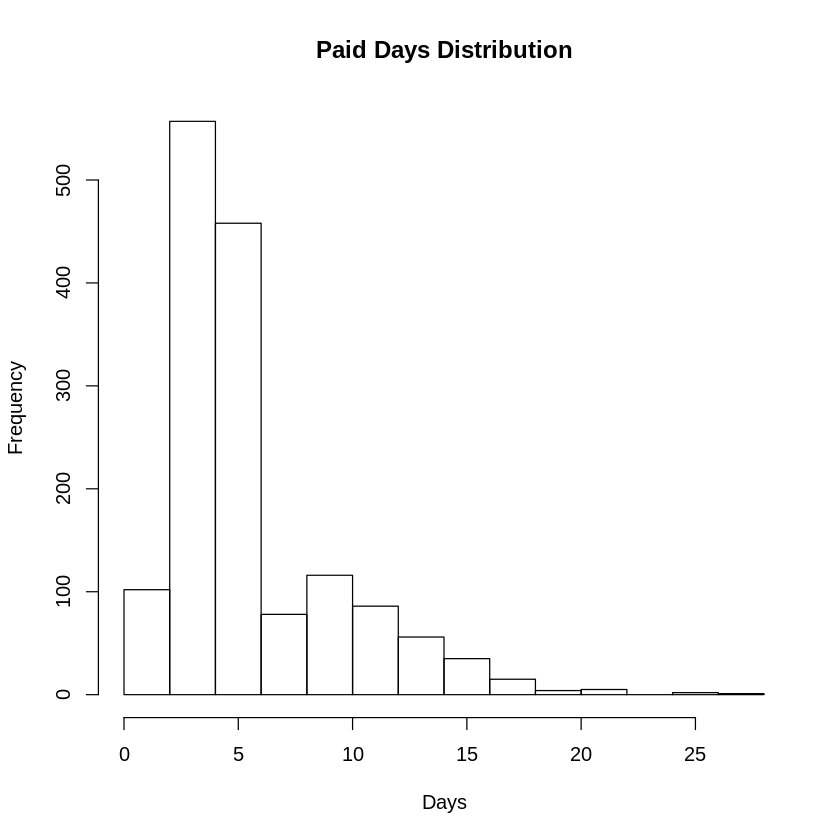

In [26]:
hist(bank_cleaned$pdays, main = "Paid Days Distribution",xlab ="Days")

That seems to make no sense, but we lack data in this column.\
We need to convert education column’s values to numeric values.

In [27]:
bank_cleaned$education[bank_cleaned$education == "illiterate"] = 0
bank_cleaned$education[bank_cleaned$education == "basic.4y"] = 4
bank_cleaned$education[bank_cleaned$education == "basic.6y"] = 6
bank_cleaned$education[bank_cleaned$education == "basic.9y"] = 9
bank_cleaned$education[bank_cleaned$education == "high.school"] = 12
bank_cleaned$education[bank_cleaned$education == "professional.course"] = 12
bank_cleaned$education[bank_cleaned$education == "university.degree"] = 16
bank_cleaned$education[bank_cleaned$education == "unknown"] = NaN

In [28]:
head(bank_cleaned)

age,education,previous,pdays,loan,y
56,4,0,NaN,no,no
57,12,0,NaN,no,no
37,12,0,NaN,no,no
40,6,0,NaN,no,no
56,12,0,NaN,yes,no
45,9,0,NaN,no,no


In [29]:
mean(bank_cleaned$age)
median(bank_cleaned$age)

[1] 40.02406

[1] 38

In [30]:
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}
getmode(bank_cleaned$age)

[1] 31

We need to investigate the age column as well.\
The mean value of age is 40, the median is 38 and the mode is 31.\
We need to perform some visuals for our data for better understanding.\
A box plot for age column:\
we see the the maximum is approx. 70, the minimum is approx. 18, the median is 38, the first quantile
is approx. 30 and the third quantile is approx. 50.

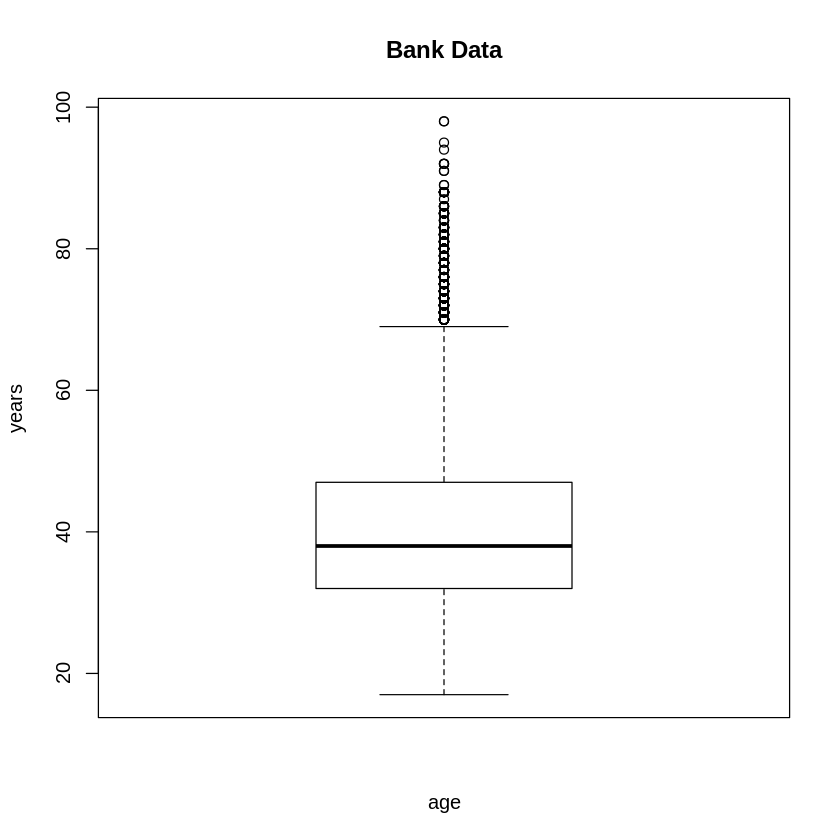

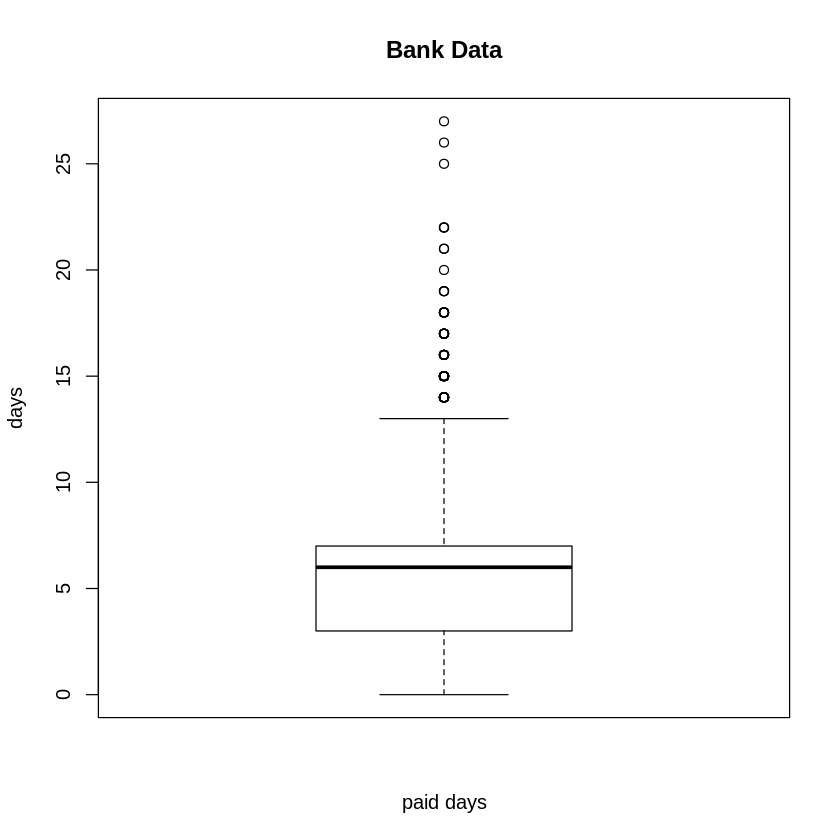

In [31]:
boxplot(bank_cleaned$age,data=bank_cleaned, main="Bank Data", xlab="age", ylab="years")
boxplot(bank_cleaned$pdays,data=bank_cleaned, main="Bank Data", xlab="paid days", ylab="days")

Here is also another plot of quantile of the data set and to include numeric and valid data, we have
plotted the age and the education.

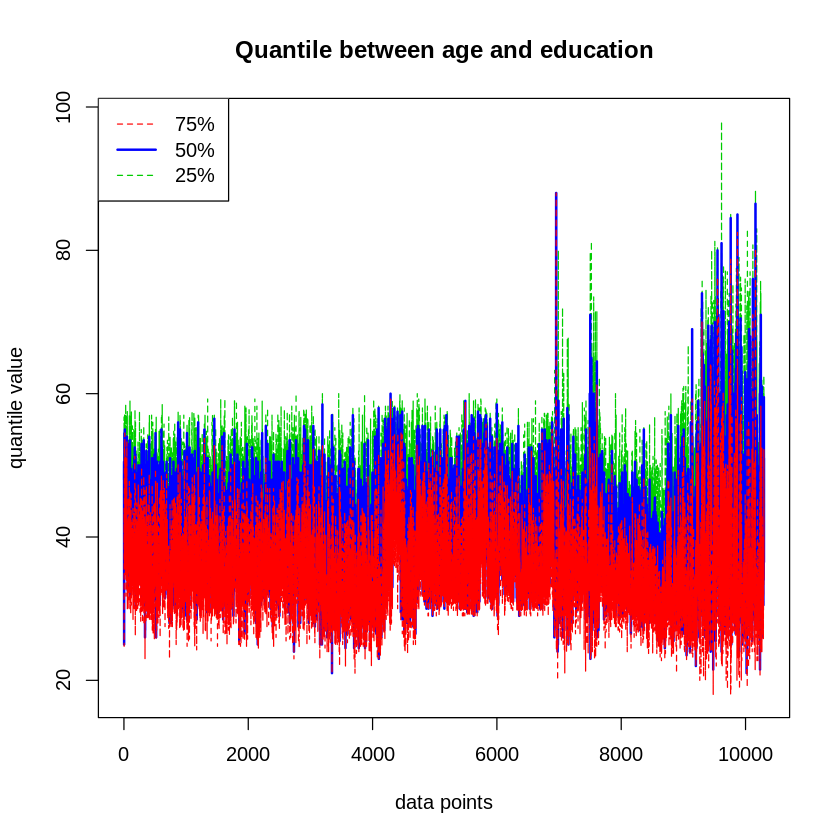

In [33]:
data=matrix(bank_cleaned$age,as.numeric(bank_cleaned$education))
qs <- apply(data,2, quantile, probs=c(0.25, 0.5, 0.75))
ylim=range(qs)
plot(seq(ncol(data)), qs[3,], t='l', lty=2, ylim=ylim,col=3, xlab ="data points", ylab ="quantile value",main="Quantile between age and education") 
lines(seq(ncol(data)), qs[2,], lty=1, lwd=2,col=4) 
lines(seq(ncol(data)), qs[1,], t='l',lty=2, col=2)  
legend("topleft", legend=rev(rownames(qs)), lwd=c(1,2,1), col=c(2,4,3), lty=c(2,1,2))



the maximum is approx. 13, the minimum is approx. 0, the median is 6, the first quantile is approx. 3
and the third quantile is approx. 7.\
At last we need to scale the age column, here is a box plot again for it but scaled:

[1] -2.017422 -2.113380  2.876425  2.492593  3.452171

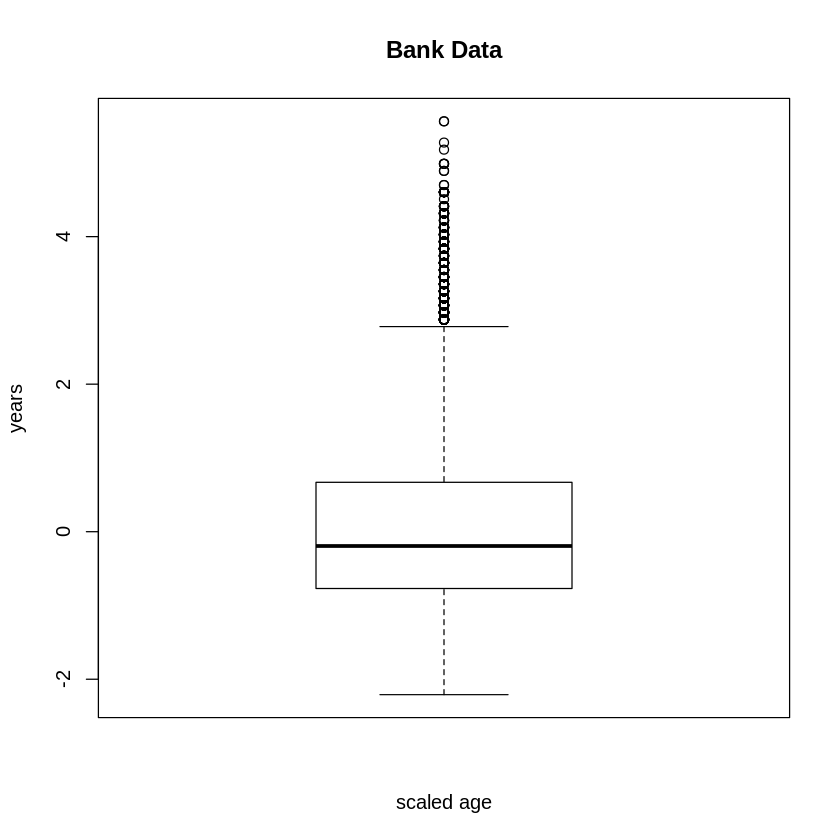

In [37]:
age_z=scale(bank_cleaned$age)
boxplot(age_z,data=bank_cleaned, main="Bank Data", xlab="scaled age", ylab="years")
outliers=age_z[ which(age_z < -2 | age_z > 2.4)]
outliers[1:5]



#### References: 
[1] https://www.tutorialspoint.com/r/r_mean_median_mode.htm \
[2] https://stackoverflow.com/questions/19754764/plot-quantiles-in-r \
[3] https://stackoverflow.com/questions/16819956/warning-message-in-invalid-factor-level-na-generated